In [3]:
import pandas as pd
import datetime
import numpy 
import seaborn as sns
%matplotlib inline

In [4]:
climate_crime = pd.read_csv('ProcessedData/ny_climate_crime.csv')
print(climate_crime.dtypes)

date                      object
OFNS_DESC                 object
avg(humidity)            float64
avg(pressure)            float64
avg(temperature)         float64
avg(wind_direction)      float64
avg(wind_speed)          float64
avg(weather_desc_cat)    float64
ofns_ids                 float64
dtype: object


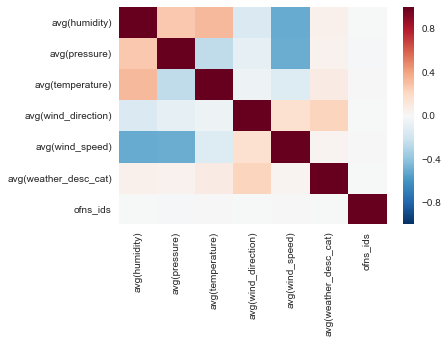

In [5]:
# Removing labeled dimensions
climate_crime = climate_crime.drop('date', axis=1)
climate_crime = climate_crime.drop('OFNS_DESC', axis=1)


corr = climate_crime.corr()
sns.heatmap(corr)

The above graph makes it clear that the crime has very less relation with climatic conditions, if we consider covariance. Thus, we need to find another way to check if any relation exists.

In [6]:
import pandas as pd
import datetime
import numpy 
from sklearn.ensemble import RandomForestClassifier
features_list = climate_crime.columns.values[0:6]
print("Features List:", features_list)
X = climate_crime.values[:,0:6]
#print(X)
#set y equal to all Score values
y = climate_crime.values[:,-1]
#print(y)


rf = RandomForestClassifier()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features_list), 
             reverse=True))

Features List: ['avg(humidity)' 'avg(pressure)' 'avg(temperature)' 'avg(wind_direction)'
 'avg(wind_speed)' 'avg(weather_desc_cat)']
Features sorted by their score:
[(0.32450000000000001, 'avg(temperature)'), (0.2092, 'avg(pressure)'), (0.19520000000000001, 'avg(wind_direction)'), (0.14480000000000001, 'avg(wind_speed)'), (0.1197, 'avg(humidity)'), (0.0066, 'avg(weather_desc_cat)')]


In the above aproach, we have calculated entropy of each leaf (feature) which would give us an idea if any of the features are related to the type of crime. The results are self explanatory. More information about entropy and information gain can be found in the below link.

http://dni-institute.in/blogs/decision-tree-entropy-and-information-gain/